## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_MouseStudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_MouseStudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
combined_MouseStudy_df['Mouse ID'].nunique()



#****combined_MouseStudy_df.loc[:,'Mouse ID'].unique()*****to list all unique mouse name



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF = combined_MouseStudy_df[combined_MouseStudy_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRowsDF['Mouse ID'].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_MouseStudy_df[combined_MouseStudy_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_MouseStudy_df.sort_values(['Mouse ID','Timepoint'], inplace = True) 
clean_df = combined_MouseStudy_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = 'first') 



#df = df.drop_duplicates(subset='favorite_color', keep="first")

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#Group by Drug Regimen & Tumor Volume
rt_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


#Calculate Mean
rt_mean = rt_df.mean() 
rt_mean

#Calculate Median
rt_median = rt_df.median() 
rt_median

#Calculate Variance
rt_variance = rt_df.var() 
rt_variance


#Calculate Standard Deviation
rt_stand_deviation = rt_df.std() 
rt_stand_deviation

#Calculate Standard Error of Mean (SEM)
rt_stand_SEM = rt_df.sem() 
rt_stand_SEM


#Summar Statistics Table
summary_statistics_df = pd.DataFrame({ "Mean": rt_mean,
                                        "Median": rt_median,
                                        "Variance": rt_variance,
                                        "Standard Deviation":rt_stand_deviation,
                                        "SEM": rt_stand_SEM,
                                         
                                    })

summary_statistics_df 






,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Number of Data Points')

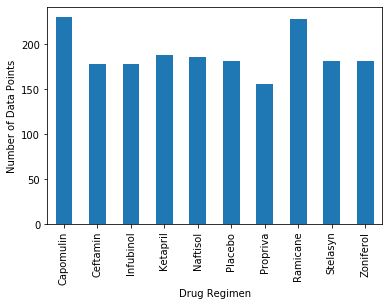

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the 
#course of the study using pandas. 

#Drug and Mouse count
id_drug = (clean_df.groupby('Drug Regimen')['Mouse ID']).count()

#Plot bar chart
#id_drug.plot.bar(align="center", legend='')
id_drug.plot.bar(align='center', legend='')
plt.xticks(rotation='vertical')

#Name x and y labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

 


<function matplotlib.pyplot.show(*args, **kw)>

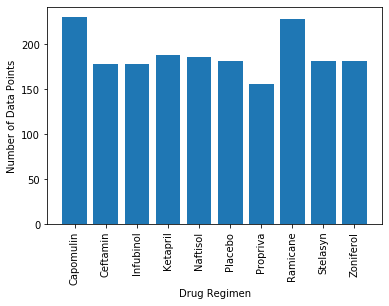

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Set x axis and tick locations
x_axis = np.arange(len(id_drug))

#x_axis = np.arange(len(id_drug))
tick_mouse = [value for value in id_drug]

#set x ticks
plt.xticks(x_axis, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
                    'Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], rotation='vertical')

plt.bar(x_axis,tick_mouse)

#set x and y labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show


## Pie Plots

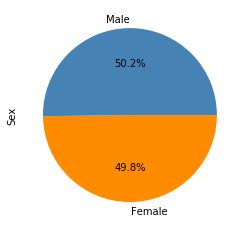

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby(['Sex','Mouse ID'])

gender_df=pd.DataFrame(gender.size())

gender_plot = gender_df.groupby(['Sex']).count()
gender_plot.columns=['Sex']


gender_plot.plot.pie(y= 'Sex', legend='', autopct='%1.1f%%',colors=['darkorange','steelblue'], counterclock=False)



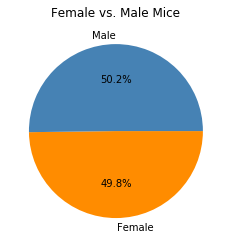

In [11]:
# # Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_type = ['Female', 'Male']
x_axis = [124,125]
explode = (0,0)

plt.pie(x_axis, explode, labels=gender_type, autopct='%1.1f%%', colors=['darkorange','steelblue'], counterclock=False)
z=plt.title('Female vs. Male Mice')


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#---05-Matplotlib/3/Activities/02-Ins_Quartiles_and_Outliers/Solved/samples.ipynb


first_q =rt_df.quantile(.25)
first_q 

third_q= rt_df.quantile(.75)
third_q

rt_iqr = third_q - first_q
rt_iqr

lower_bound = first_q - (1.5*rt_iqr)
upper_bound = third_q - (1.5*rt_iqr)

summary_statistics_df['IQR'] = rt_iqr #Add quartile column
summary_statistics_df['Lower Bound'] = lower_bound
summary_statistics_df['Upper Bound'] = upper_bound
summary_statistics_df['1QR'] = first_q
summary_statistics_df['3QR'] = third_q
find_outliers = summary_statistics_df.nsmallest(4,'SEM') # Get 4 Drug based on lowest SEM
find_outliers
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")
#### ANY POTENITAL OUTLIERS????? ########################################


,Mean,Median,Variance,Standard Deviation,SEM,IQR,Lower Bound,Upper Bound,1QR,3QR
Drug Regimen,,,,,,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,8.325365,24.186586,32.511952,36.674635,45.000000
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,7.314067,26.714832,34.028899,37.685933,45.000000
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,9.593010,32.818911,42.411922,47.208427,56.801438
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,10.002091,32.309217,42.311308,47.312353,57.314444


In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
